In [1]:
import os
import pickle

import numpy as np
import torch as tc
import tqdm
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [3]:
def plotting_signal(s, y, p=None, name="none"):
    assert len(s) == len(y)
    # between = np.arange(s.min(), s.max()+1)
    plt.plot(range(len(s)), s, color="black")
    if y:
        between = np.arange(0, s.max() + 1)
        for idx, val in enumerate(y):
            if val == 1:
                plt.plot([idx] * len(between), between, color="red", alpha=0.7)
    if p:
        between = np.arange(s.min() - 1, 0)
        for idx, val in enumerate(p):
            if val == 1:
                plt.plot([idx] * len(between), between, color="blue", alpha=0.6)
    # plt.title("Noise Level=%s" % name)
    plt.show()
    # plt.savefig("figures/%s.pdf" % name)
    plt.clf()
    

In [4]:
class DataReader(tc.utils.data.Dataset):
    def __init__(self, fpath):
        tc.utils.data.Dataset.__init__(self)
        self._data = np.load(fpath)

    def __len__(self):
        return len(self._data)

    def __getitem__(self, idx):
        x = self._data[idx][:1000]
        x = (x - x.mean()) / x.std()
        y = [0] * len(x)
        for idx in find_peaks(x, distance=50)[0].tolist():
            y[idx] = 1
        plotting_signal(x, y)
        return (tc.tensor(x, dtype=tc.float32), tc.tensor(y, dtype=tc.int64))

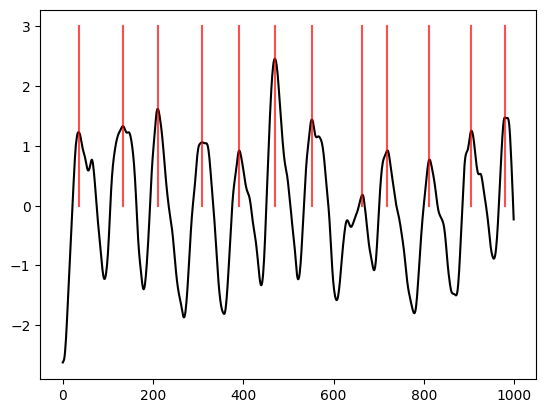

<Figure size 640x480 with 0 Axes>

In [7]:
test2 = DataReader(
            "../datasets/testing/extracted_envelope_data_test.npy"
            # "../datasets/real_BSG_data/envelope_data/extracted_envelope_data_test.npy"
            # "../datasets/testing/extracted_envelope_data_10k.npy"
        )
test2_iter = iter(test2)
t = next(test2_iter)